In [172]:
import numpy as np

data = np.load('/content/data100.npy')
target = np.load('/content/target100.npy')



In [173]:
print(data.shape)
print(target.shape)

(8005, 100, 100, 1)
(8005,)


In [174]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten
from keras.layers import BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam

model = Sequential()

# Block 1
model.add(Conv2D(128,(3,3),padding='same',input_shape=(100,100,1),kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Classifier
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='orthogonal'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu',kernel_initializer='orthogonal'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0003),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)              │ (None, 100, 100, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 100, 100, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_82 (Activation)      │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 50, 50, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_83 (Activation)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 25, 25, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,433 (2.14 MB)

 Trainable params: 559,985 (2.14 MB)

 Non-trainable params: 448 (1.75 KB)

In [175]:

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)


In [176]:
#Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    fill_mode="nearest",
    horizontal_flip=True,
)

In [177]:
history = model.fit(
    aug.flow( train_data,
              train_target),
    batch_size=32,
    epochs=20,
    validation_data=(test_data, test_target)
    )

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.5310 - loss: 0.7250 - val_accuracy: 0.4984 - val_loss: 0.6911
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.6030 - loss: 0.6611 - val_accuracy: 0.5028 - val_loss: 0.8052
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.6228 - loss: 0.6428 - val_accuracy: 0.6796 - val_loss: 0.5911
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6484 - loss: 0.6187 - val_accuracy: 0.5372 - val_loss: 0.6781
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.6968 - loss: 0.5931 - val_accuracy: 0.7327 - val_loss: 0.5451
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7187 - loss: 0.5507 - val_accuracy: 0.7639 - val_loss: 0.4896
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7321 - loss: 0.5410 - val_accuracy: 0.7339 - val_loss: 0.5767
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7465 - loss: 0.5201 - val_accuracy:

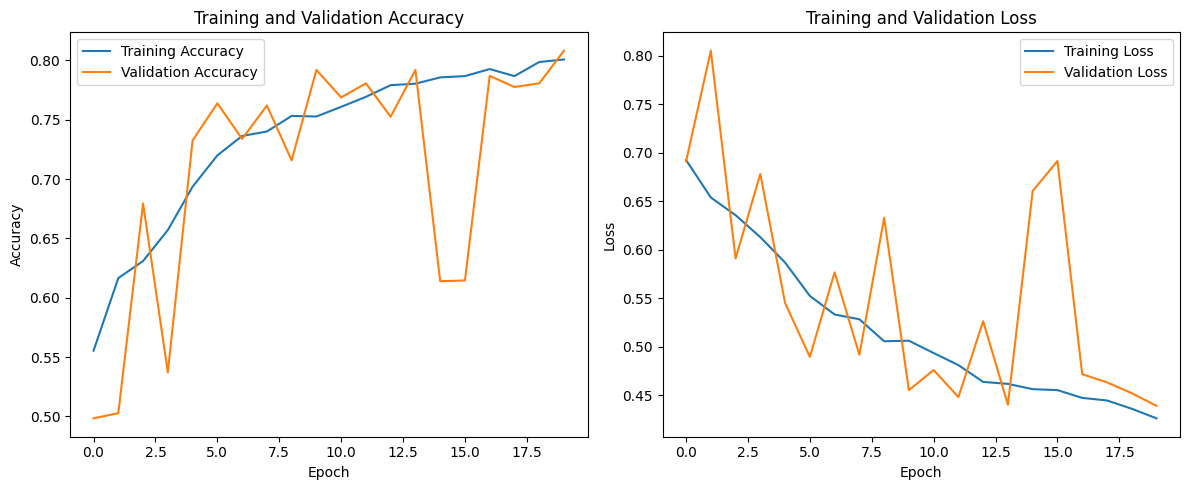

In [178]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [179]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN Cat and Dog Classifier/models/catdogclassifier.keras')